# Day 08. Exercise 05
# Clustering

## 0. Imports

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

## 1. Preprocessing

1. Read the file [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) to a dataframe.
2. Remove the `pageviews`, we will cluster the users only by the number of the commits and their average difference.

In [2]:
df = pd.read_csv('../data/regression.csv')

In [3]:
df.drop('pageviews', axis=1, inplace=True)

## 2. KMeans

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters, use `random_state=21` and `n_clusters=3`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `n_clusters` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [4]:
X = df.drop('uid', axis=1).values
y = df['uid']
kmean = KMeans(n_clusters=3, random_state=21).fit(X)

c:\Users\ashot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


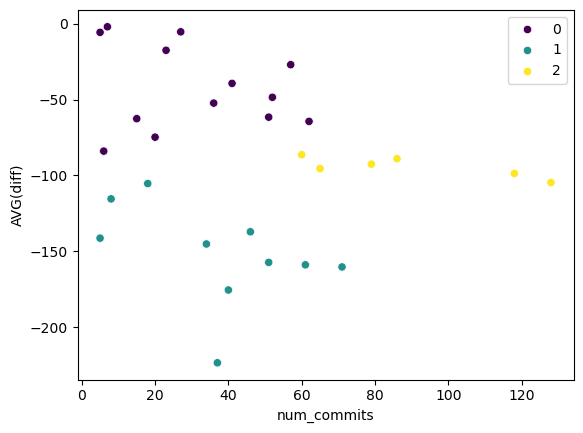

In [5]:
sns.scatterplot(x=df['num_commits'], y=df['AVG(diff)'], hue=kmean.labels_, palette='viridis')
plt.show()

c:\Users\ashot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


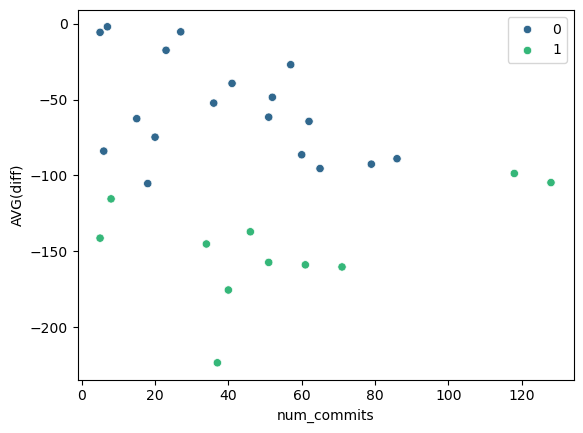

In [6]:
kmean2 = KMeans(n_clusters=2, random_state=21).fit(X)
sns.scatterplot(x=df['num_commits'], y=df['AVG(diff)'], hue=kmean2.labels_, palette='viridis')
plt.show()

c:\Users\ashot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


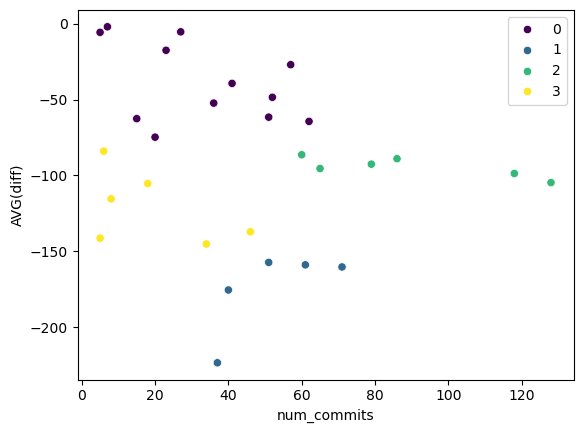

In [7]:
kmean4 = KMeans(n_clusters=4, random_state=21).fit(X)
sns.scatterplot(x=df['num_commits'], y=df['AVG(diff)'], hue=kmean4.labels_, palette='viridis')
plt.show()

In [8]:
ss3 = silhouette_score(X, kmean.labels_)
ss2 = silhouette_score(X, kmean2.labels_)
ss4 = silhouette_score(X, kmean4.labels_)
print(f"silhouette_score for 3 clusters: {ss3}")
print(f"silhouette_score for 2 clusters: {ss2}")
print(f"silhouette_score for 4 clusters: {ss4}")

silhouette_score for 3 clusters: 0.4454402135233297
silhouette_score for 2 clusters: 0.4194920562377423
silhouette_score for 4 clusters: 0.41503879936268956


## 3. DBSCAN

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters with `eps=20` and `min_samples=2`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `eps` and `min_samples` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [9]:
clustering = DBSCAN(eps=20, min_samples=2).fit(X)

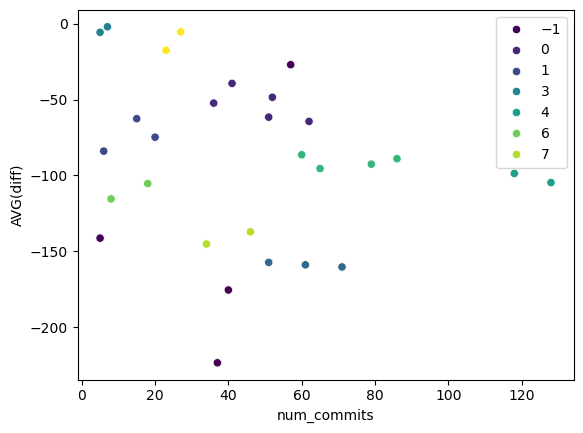

In [10]:
sns.scatterplot(x=df['num_commits'], y=df['AVG(diff)'], hue=clustering.labels_, palette='viridis')
plt.show()

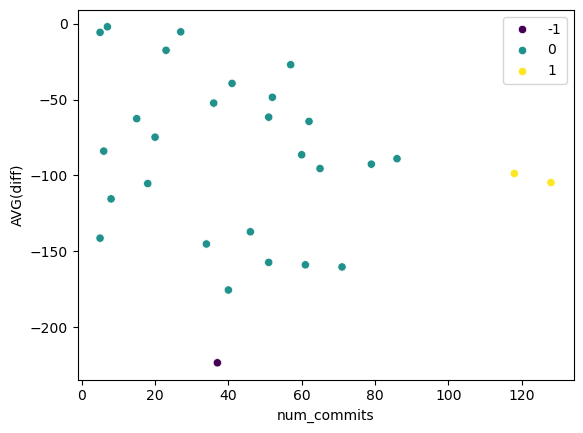

In [11]:
clustering2 = DBSCAN(eps=30, min_samples=2).fit(X)
sns.scatterplot(x=df['num_commits'], y=df['AVG(diff)'], hue=clustering2.labels_, palette='viridis')
plt.show()

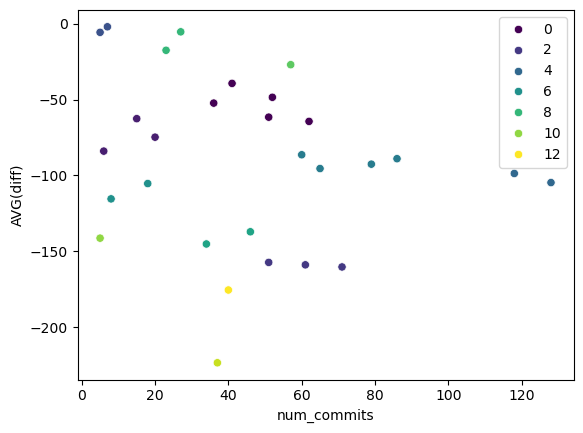

In [12]:
clustering3 = DBSCAN(eps=20, min_samples=1).fit(X)
sns.scatterplot(x=df['num_commits'], y=df['AVG(diff)'], hue=clustering3.labels_, palette='viridis')
plt.show()

In [13]:
dbs = silhouette_score(X, clustering.labels_)
dbs2 = silhouette_score(X, clustering2.labels_)
dbs4 = silhouette_score(X, clustering3.labels_)
print(f"silhouette_score for DBscan clusters: {dbs}")
print(f"silhouette_score for DBscan2 clusters: {dbs2}")
print(f"silhouette_score for DBscan3 clusters: {dbs4}")

silhouette_score for DBscan clusters: 0.38339641455696616
silhouette_score for DBscan2 clusters: 0.19881722125199422
silhouette_score for DBscan3 clusters: 0.4322483665424573


## 4. Hierarchical (AgglomerativeClustering)

1. Use this algorithm to create clusters with `n_clusters=5`.
2. Visualize the data on a `scatter plot`.
3. Try different values of `n_clusters` and see how your plot will change.
4. Calculate the `silhouette_score`.
5. Visualize the `dendrogram`.

In [14]:
aggclust = AgglomerativeClustering(n_clusters=5).fit(X)

<Axes: xlabel='num_commits', ylabel='AVG(diff)'>

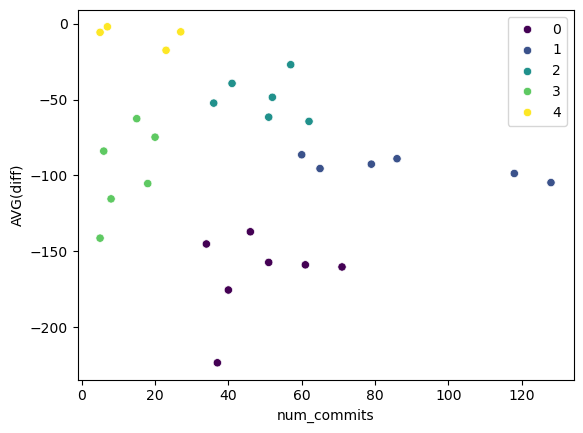

In [15]:
sns.scatterplot(x=df['num_commits'], y=df['AVG(diff)'], hue=aggclust.labels_, palette='viridis')

<Axes: xlabel='num_commits', ylabel='AVG(diff)'>

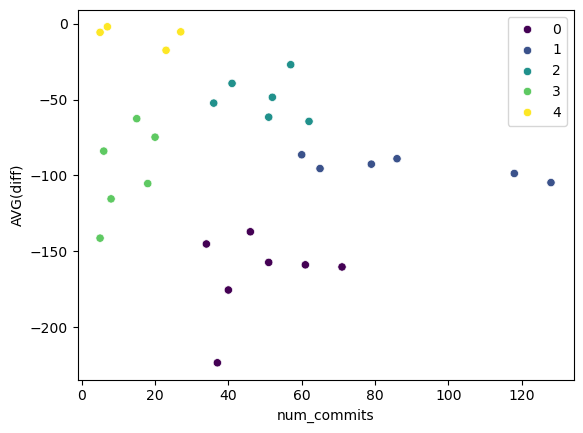

In [16]:
aggclust3n = AgglomerativeClustering(n_clusters=3).fit(X)
sns.scatterplot(x=df['num_commits'], y=df['AVG(diff)'], hue=aggclust.labels_, palette='viridis')

<Axes: xlabel='num_commits', ylabel='AVG(diff)'>

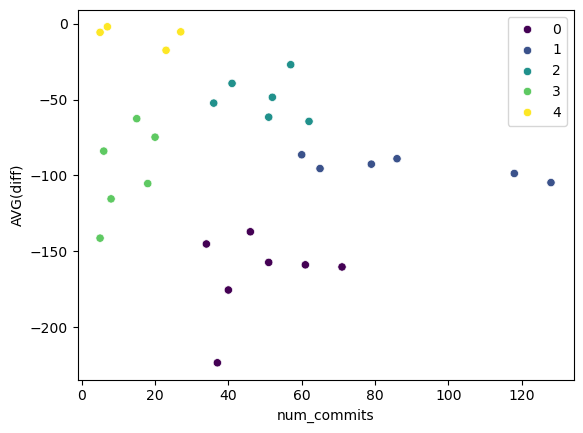

In [17]:
aggclust7n = AgglomerativeClustering(n_clusters=7).fit(X)
sns.scatterplot(x=df['num_commits'], y=df['AVG(diff)'], hue=aggclust.labels_, palette='viridis')

In [18]:
agss = silhouette_score(X, aggclust.labels_)
agss2 = silhouette_score(X, aggclust3n.labels_)
agss3 = silhouette_score(X, aggclust7n.labels_)
print(f"silhouette_score for aggclut 5n clusters: {agss}")
print(f"silhouette_score for aggclut 3n clusters: {agss2}")
print(f"silhouette_score for aggclut 7n clusters: {agss3}")

silhouette_score for aggclut 5n clusters: 0.46383015199381467
silhouette_score for aggclut 3n clusters: 0.3390493703444805
silhouette_score for aggclut 7n clusters: 0.4865808853184314


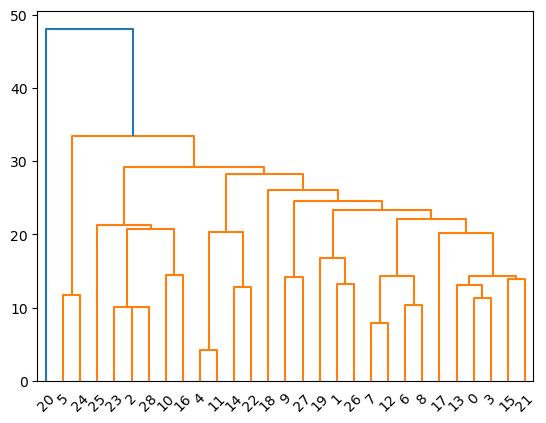

In [19]:
dendrogram(Z=linkage(X))
plt.show()

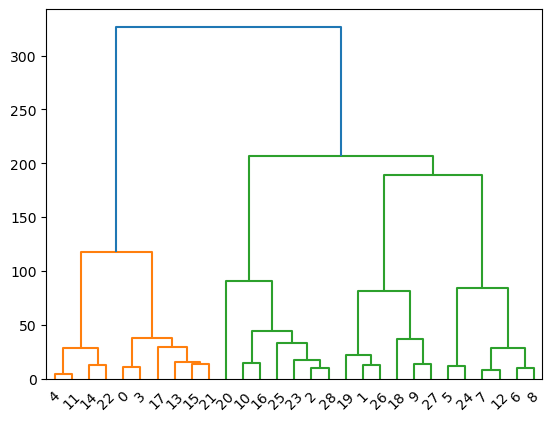

In [20]:
dendrogram(Z=linkage(X, method='ward'))
plt.show()

## 5. Function

Write a function that:
1. Takes as arguments: model class of clustering, its parameters, the name of the parameter for optimization, the range of the parameter values to try.
2. Tries different values from the given parameter range and calculates the `silhouette_score` for each value from the range.
3. Finds out the best value for the parameter in the range.
4. Returns two subplots:


- - the first shows how the `silhouette_score` changes depending on the value of the parameter,
- - the second visualizes the data on a `scatter plot` using the clustering model with the best value of the parameter.

In [21]:
def optimize_clastering_parameter(model_class, params, param_name, param_range, X):
    scores = []
    best_param_value = None
    best_silhouette_score = -1

    for value in param_range:
        params.update({param_name : value})
        model = model_class(**params)
        labels = model.fit_predict(X)
        silhouette_avg = silhouette_score(X, labels)
        scores.append(silhouette_avg)
        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_param_value = value

    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.plot(param_range, scores, marker='o')
    plt.title(f'Silhouette Score vs {param_name.capitalize()} Value')
    plt.xlabel(param_name.capitalize())
    plt.ylabel('Silhouette Score')

    params.update({param_name: best_param_value})
    model = model_class(**params)
    labels = model.fit_predict(X)

    plt.subplot(122)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette="Set2")
    plt.title(f'Best {param_name} Value: {best_param_value}')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

    plt.tight_layout()
    plt.show()

    return best_param_value, best_silhouette_score

In [ ]:
params = {'random_state': 21}
param_range = list(range(2, 11))

optimize_clastering_parameter(KMeans, params, 'n_clusters', param_range, X)